In [34]:
## USED Information Gain for feature selection

In [35]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## for feature selection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [36]:
df=pd.read_csv("UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [37]:
# # Dividing dependent and independent variables
X = df.drop("default.payment.next.month", axis=1)
y = df["default.payment.next.month"]

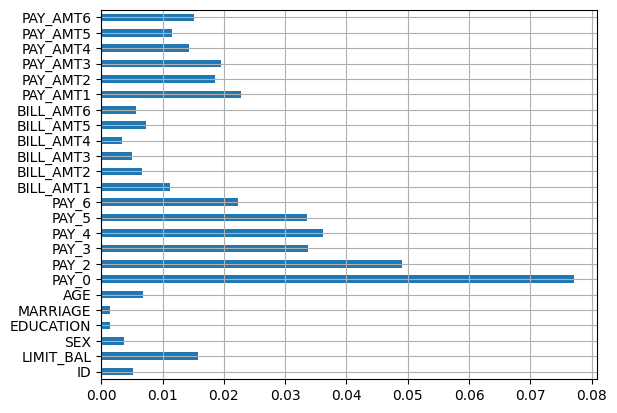

In [38]:
from sklearn.feature_selection import mutual_info_classif

importances=mutual_info_classif(X,y)
feat_importances=pd.Series(importances,df.columns[0:len(df.columns)-1])
feat_importances.plot(kind="barh")
plt.grid(True)
plt.show()

In [39]:
X=pd.DataFrame({"LIMIT_BAL":df["LIMIT_BAL"],"PAY_0":df["PAY_0"],"PAY_2":df["PAY_2"],"PAY_3":df["PAY_3"],"PAY_4":df["PAY_4"],"PAY_5":df["PAY_5"],"PAY_6":df["PAY_6"],"PAY_AMT1":df["PAY_AMT1"],"PAY_AMT2":df["PAY_AMT2"],"PAY_AMT3":df["PAY_AMT3"],"PAY_AMT4":df["PAY_AMT4"],"PAY_AMT5":df["PAY_AMT5"],"PAY_AMT6":df["PAY_AMT6"]})

In [40]:
X.head(2)

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,-1,-1,-2,-2,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,-1,2,0,0,0,2,0.0,1000.0,1000.0,1000.0,0.0,2000.0


In [41]:
y.head(2)

0    1
1    1
Name: default.payment.next.month, dtype: int64

In [42]:
y.value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [43]:
# Sampling
from imblearn.over_sampling import SMOTE 
from collections import Counter

sampler = SMOTE()
X, y = sampler.fit_resample(X, y)

print('SMOTE {}'.format(Counter(y)))

SMOTE Counter({1: 23364, 0: 23364})


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,random_state=0)
rf_model=clf.fit(X_train, y_train)
y_pred=rf_model.predict(X_test)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      4664
           1       0.85      0.79      0.82      4682

    accuracy                           0.82      9346
   macro avg       0.82      0.82      0.82      9346
weighted avg       0.82      0.82      0.82      9346



In [47]:
confusion_matrix(y_test,y_pred)

array([[4002,  662],
       [ 996, 3686]])